In [25]:
%matplotlib inline

In [26]:
import pandas as pd

In [27]:
ls -l

total 2440
-rw-r--r--  1 hu5ky5n0w  staff    84977 Oct 15 20:02 KNN.ipynb
-rw-r--r--  1 hu5ky5n0w  staff     3347 Sep 27 19:52 KNN.py
-rw-r--r--  1 hu5ky5n0w  staff  1114509 Oct 29 14:34 Untitled.ipynb
-rwxr-xr-x  1 hu5ky5n0w  staff    23873 Sep 14 20:12 diabetes.csv*
-rw-r--r--  1 hu5ky5n0w  staff    14839 Sep 15 16:42 jupyter.log


In [28]:
db_df = pd.DataFrame(pd.read_csv('diabetes.csv'))
db_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# db_df['Pregnancies']

In [30]:
import numpy as np

In [31]:
db_df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [32]:
# columns = [db_df.Pregnancies, db_df.Glucose, db_df.BloodPressure, db_df.SkinThickness,
#            db_df.Insulin, db_df.BMI, db_df.DiabetesPedigreeFunction, db_df.Age, db_df.Outcome]
# for c in columns:
#     print(stat.mode(db_df.Glucose))

In [33]:
db_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
db_df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [35]:
import matplotlib.pyplot as plt

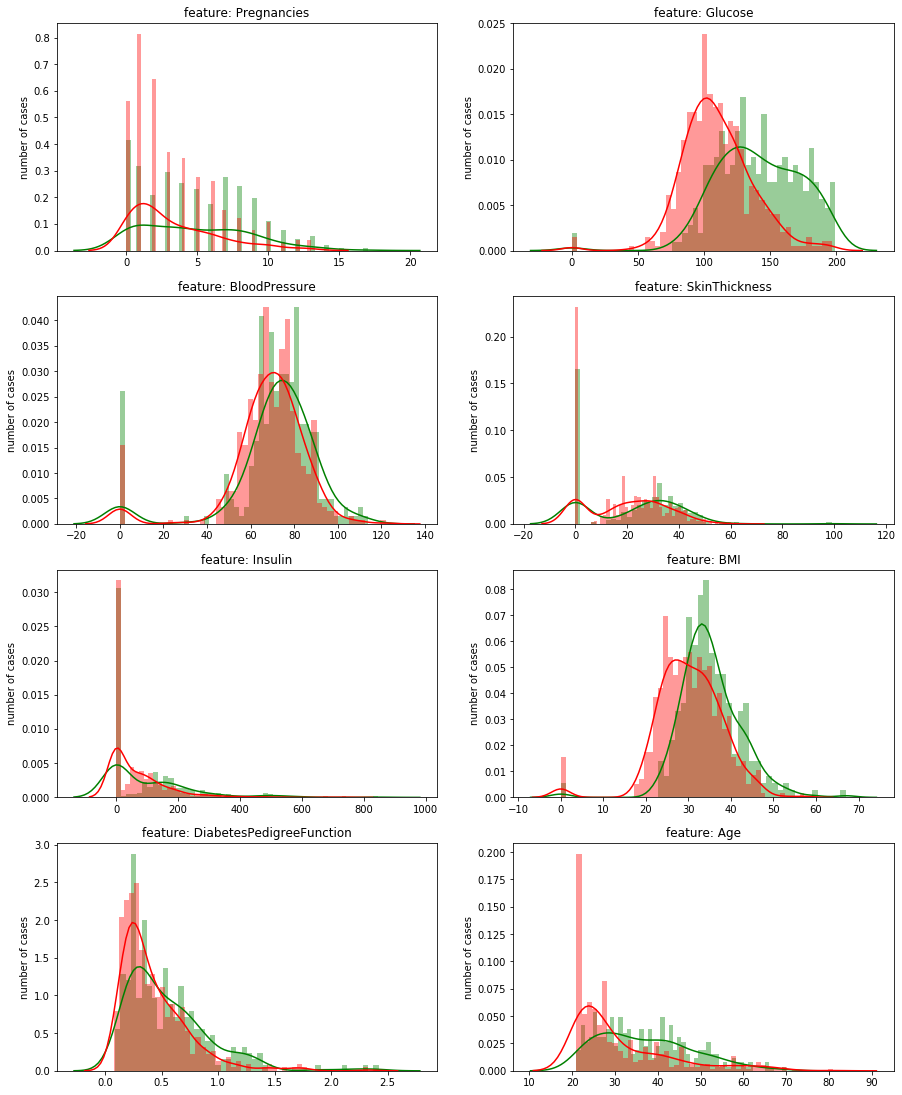

In [36]:
import seaborn as sns
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(28,2)
plt.figure(figsize=(15, 28*5))
for i, col in enumerate(db_df[db_df.iloc[:,0:8].columns]):
    axis = plt.subplot(grid[i])
    sns.distplot(db_df[col][db_df.Outcome == 1], kde=True, bins=50, color='g')
    sns.distplot(db_df[col][db_df.Outcome == 0], kde=True, bins=50, color='r')
    axis.set_xlabel('')
    axis.set_ylabel('number of cases')
    axis.set_title ('feature: ' + str(col))
plt.show()

In [37]:
from pandas.plotting import scatter_matrix

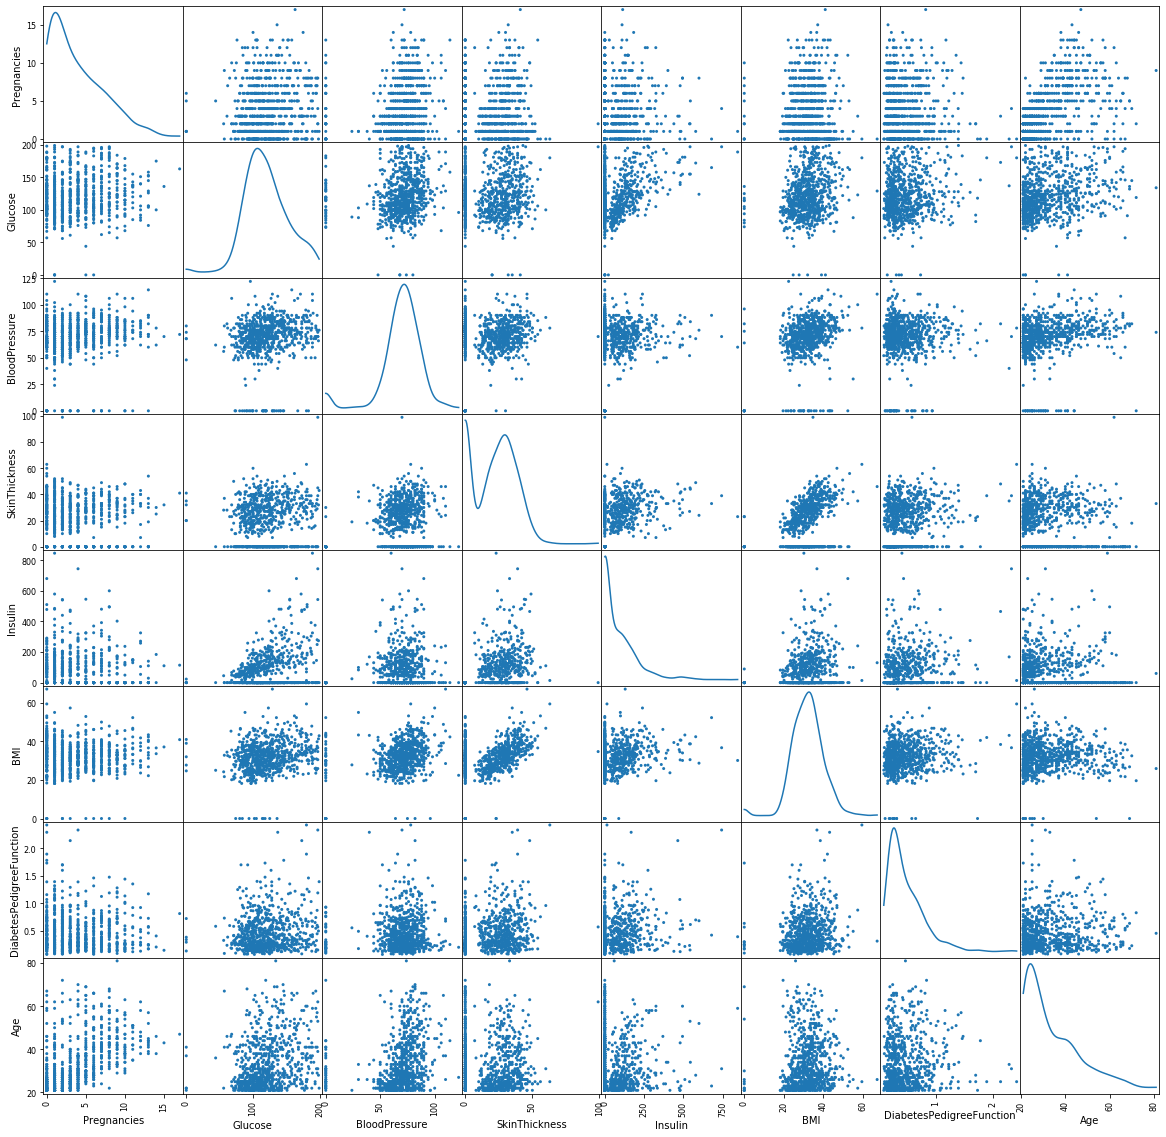

In [38]:
cols = db_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                'DiabetesPedigreeFunction', 'Age']]
scatter_matrix(cols, figsize=(20, 20), alpha=1, diagonal='kde')
plt.show()

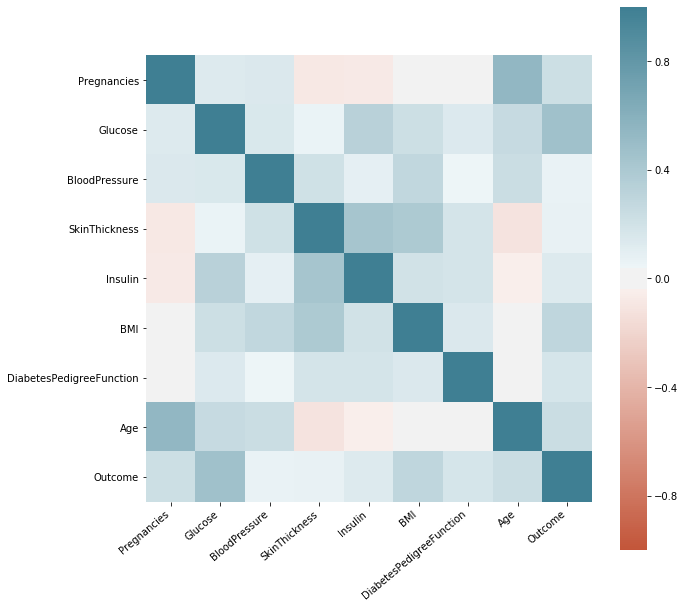

In [58]:
corr = db_df.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0, 
    cmap=sns.diverging_palette(20, 220, n=256), square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()

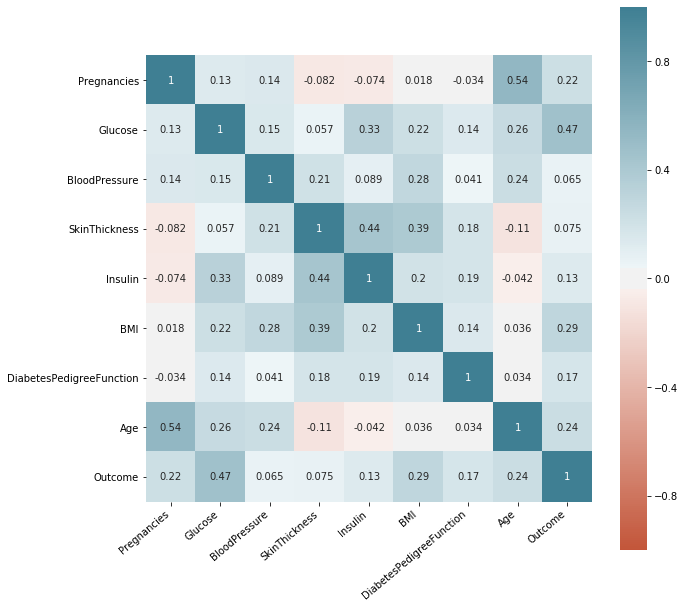

In [56]:
corr = db_df.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0, 
    cmap=sns.diverging_palette(20, 220, n=256), square=True, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()

In [66]:
corr.stack()
corr_df.columns = ['Pregnancies', 'Glucose' 'Outcome']

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements